<a href="https://colab.research.google.com/github/DLPY/Classification_Session_2/blob/main/Classification_Session2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification Session 2 - Notebook

##**1.Import Pandas, Pyplot and Read data**

In [ ]:
import matplotlib.pyplot as plt #Visualization Lib
import numpy as np #mathamatical functions
import pandas as pd #Data manipulation lib
import seaborn as sns #Visualization Lib
from sklearn import metrics, preprocessing

In [ ]:
# CSV is first read in from a github raw file another option is to import the notebook to your session storage by click on the file icon on left toolbar then importing csv
! wget https://raw.githubusercontent.com/DLPY/Classification_Session_2/main/Student2020.csv

--2022-02-20 12:58:21--  https://raw.githubusercontent.com/DLPY/Classification_Session_2/main/Student2020.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 113427 (111K) [text/plain]
Saving to: ‘Student2020.csv.4’

Student2020.csv.4   100%[===================>] 110.77K  --.-KB/s    in 0.02s   

2022-02-20 12:58:21 (5.14 MB/s) - ‘Student2020.csv.4’ saved [113427/113427]



In [ ]:
# Once we have the csv file pd.read_csv() converts it to a pandas dataframe
df = pd.read_csv('Student2020.csv')
df['Pass'] = df['Pass'].apply(lambda x : 0 if x == 'Fail' else 1 )

##**2. Exploratory Data Analysis (EDA)**

In [ ]:
# Display the count of rows and columns.
df.shape

(1131, 13)

In [ ]:
# Review a small sample of the data.
df.head()

,age,Auditory,Kinaesthetic,Visual,ExtrinsicMotivation,IntrinsicMotivation,SelfEfficacy,StudyTime,Conscientiousness,CAOpoints,Maths,English,Pass
0,19,5.000000,6.698392,3.301608,9.308199,6.875000,7.321865,7.790997,8.721329,352,19,45,1
1,31,6.285538,2.500000,6.214462,7.535538,6.303307,7.095179,6.892769,6.440564,187,35,28,1
2,36,6.776966,2.500000,5.723034,8.026966,7.040449,7.258989,7.138483,6.194850,111,21,17,1
3,22,6.756132,3.987737,4.256132,6.621934,5.945164,5.089465,2.500000,4.042689,327,36,46,0
4,23,7.228655,2.228655,5.542690,6.453509,6.942836,6.285575,3.314034,4.528460,274,33,35,0


age                    0
Auditory               0
Kinaesthetic           0
Visual                 0
ExtrinsicMotivation    0
IntrinsicMotivation    0
SelfEfficacy           0
StudyTime              0
Conscientiousness      0
CAOpoints              0
Maths                  0
English                0
Pass                   0
dtype: int64


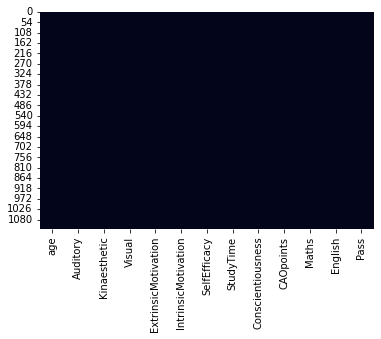

In [ ]:
#Checking for null values
print(df.isnull().sum())
sns.heatmap(df.isnull(), cbar=False)

In [ ]:
# Detailed overview of the dataframe itself.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1131 entries, 0 to 1130
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1131 non-null   int64  
 1   Auditory             1131 non-null   float64
 2   Kinaesthetic         1131 non-null   float64
 3   Visual               1131 non-null   float64
 4   ExtrinsicMotivation  1131 non-null   float64
 5   IntrinsicMotivation  1131 non-null   float64
 6   SelfEfficacy         1131 non-null   float64
 7   StudyTime            1131 non-null   float64
 8   Conscientiousness    1131 non-null   float64
 9   CAOpoints            1131 non-null   int64  
 10  Maths                1131 non-null   int64  
 11  English              1131 non-null   int64  
 12  Pass                 1131 non-null   int64  
dtypes: float64(8), int64(5)
memory usage: 115.0 KB


In [ ]:
# remove duplicates, if any
df = df[~df.duplicated()] 
df.shape
#No duplicate values

(1124, 13)

 ### i) Investigate correlation in the new dataframe.

In [ ]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,age,Auditory,Kinaesthetic,Visual,ExtrinsicMotivation,IntrinsicMotivation,SelfEfficacy,StudyTime,Conscientiousness,CAOpoints,Maths,English,Pass
age,1.000000,0.016825,-0.063601,0.054816,0.171059,0.319739,0.172420,0.030663,0.305867,-0.691308,-0.458193,-0.619608,0.084879
Auditory,0.016825,1.000000,-0.543289,-0.351479,0.055003,0.021396,0.039490,-0.001030,0.015399,0.098766,0.087820,0.088407,-0.004460
Kinaesthetic,-0.063601,-0.543289,1.000000,-0.595024,-0.114987,-0.093360,-0.133687,0.053333,-0.069957,-0.002090,-0.028390,0.045155,-0.167694
Visual,0.054816,-0.351479,-0.595024,1.000000,0.075570,0.083625,0.111273,-0.058486,0.063269,-0.092219,-0.052413,-0.134986,0.191269
ExtrinsicMotivation,0.171059,0.055003,-0.114987,0.075570,1.000000,0.448323,0.394495,0.216675,0.391213,-0.167776,0.022150,-0.199346,0.129208
IntrinsicMotivation,0.319739,0.021396,-0.093360,0.083625,0.448323,1.000000,0.484760,0.307273,0.437472,-0.249305,-0.138660,-0.249421,0.189505
SelfEfficacy,0.172420,0.039490,-0.133687,0.111273,0.394495,0.484760,1.000000,0.327281,0.383013,-0.149774,-0.002650,-0.199836,0.076327
StudyTime,0.030663,-0.001030,0.053333,-0.058486,0.216675,0.307273,0.327281,1.000000,0.461622,0.011378,0.035673,-0.024674,0.033838
Conscientiousness,0.305867,0.015399,-0.069957,0.063269,0.391213,0.437472,0.383013,0.461622,1.000000,-0.234315,-0.158174,-0.241094,0.085627
CAOpoints,-0.691308,0.098766,-0.002090,-0.092219,-0.167776,-0.249305,-0.149774,0.011378,-0.234315,1.000000,0.723115,0.875378,0.073912


### ii) Variables correlated to Pass.

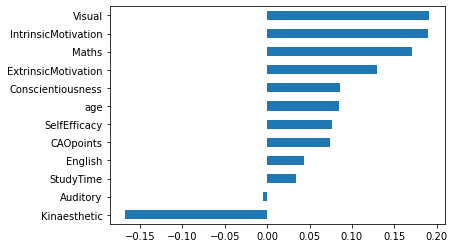

In [ ]:
df.corr()['Pass'].sort_values().drop('Pass').plot(kind='barh')

### iii) Summary of Pass and Fail

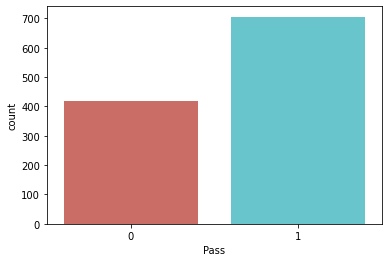

In [ ]:
sns.countplot(x='Pass', data=df, palette='hls')

From the above graph, we observed there are many more Students are 'Pass'. This is referred to as 'class imbalance'.

## **3.Standadization of data using MinMax Scaler**

In [ ]:
# Independent Variable
X = df.drop(['Pass'], axis=1)

# Depenedent Variable
y = df.Pass.values

In [ ]:
X.head()

,age,Auditory,Kinaesthetic,Visual,ExtrinsicMotivation,IntrinsicMotivation,SelfEfficacy,StudyTime,Conscientiousness,CAOpoints,Maths,English
0,19,5.000000,6.698392,3.301608,9.308199,6.875000,7.321865,7.790997,8.721329,352,19,45
1,31,6.285538,2.500000,6.214462,7.535538,6.303307,7.095179,6.892769,6.440564,187,35,28
2,36,6.776966,2.500000,5.723034,8.026966,7.040449,7.258989,7.138483,6.194850,111,21,17
3,22,6.756132,3.987737,4.256132,6.621934,5.945164,5.089465,2.500000,4.042689,327,36,46
4,23,7.228655,2.228655,5.542690,6.453509,6.942836,6.285575,3.314034,4.528460,274,33,35


In [ ]:
trans = preprocessing.MinMaxScaler(feature_range=(-1,1))
scaled_X = pd.DataFrame(trans.fit_transform(X))
column_names = ['age', 'Auditory', 'Kinaesthetic', 'Visual', 'ExtrinsicMotivation', 'IntrinsicMotivation', 'SelfEfficacy', 'StudyTime', 'Conscientiousness', 'CAOpoints', 'Maths', 'English']
X.columns = column_names

In [ ]:
scaled_X.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.951220,0.062872,0.356470,-0.384994,0.796966,0.169471,0.327615,0.507512,0.662943,0.1264,-0.62,-0.10
1,-0.365854,0.336144,-0.493733,0.217283,0.276713,0.016268,0.270702,0.307256,0.040436,-0.4016,-0.30,-0.44
2,-0.121951,0.440609,-0.493733,0.115672,0.420941,0.213808,0.311829,0.362037,-0.026629,-0.6448,-0.58,-0.66
3,-0.804878,0.436180,-0.192456,-0.187632,0.008583,-0.079707,-0.232862,-0.672094,-0.614036,0.0464,-0.28,-0.08
4,-0.756098,0.536627,-0.548682,0.078383,-0.040848,0.187649,0.067439,-0.490608,-0.481451,-0.1232,-0.34,-0.30


## **4.Classification Using KNN**

### i) KNN Model without scaler

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
knn = neigh.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
target_names = ['Pass', 'Fail']
print('Confusion Matrix\n')
print(confusion_matrix(y_test, y_pred))
print('\nClassification report\n')
print(classification_report(y_test, y_pred, target_names=target_names))

Confusion Matrix

[[ 70  62]
 [ 57 182]]

Classification report

              precision    recall  f1-score   support

        Pass       0.55      0.53      0.54       132
        Fail       0.75      0.76      0.75       239

    accuracy                           0.68       371
   macro avg       0.65      0.65      0.65       371
weighted avg       0.68      0.68      0.68       371



### ii) KNN Model with scaler

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.33, random_state=42)
neigh = KNeighborsClassifier(n_neighbors=5)
knn = neigh.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('Confusion Matrix\n')
print(confusion_matrix(y_test, y_pred))
print('\nClassification report\n')
print(classification_report(y_test, y_pred, target_names=target_names))


Confusion Matrix

[[ 84  48]
 [ 31 208]]

Classification report

              precision    recall  f1-score   support

        Pass       0.73      0.64      0.68       132
        Fail       0.81      0.87      0.84       239

    accuracy                           0.79       371
   macro avg       0.77      0.75      0.76       371
weighted avg       0.78      0.79      0.78       371



### iii) Parameter Search using For Loop

In [ ]:
for x in [5,10,15,25,30,35]:
  neigh = KNeighborsClassifier(n_neighbors=x)
  knn = neigh.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  print(f"The value of K = {x}")
  print('\nClassification report\n')
  print(classification_report(y_test, y_pred, target_names=target_names))

The value of K = 5

Classification report

              precision    recall  f1-score   support

        Pass       0.73      0.64      0.68       132
        Fail       0.81      0.87      0.84       239

    accuracy                           0.79       371
   macro avg       0.77      0.75      0.76       371
weighted avg       0.78      0.79      0.78       371

The value of K = 10

Classification report

              precision    recall  f1-score   support

        Pass       0.71      0.65      0.68       132
        Fail       0.82      0.85      0.83       239

    accuracy                           0.78       371
   macro avg       0.76      0.75      0.76       371
weighted avg       0.78      0.78      0.78       371

The value of K = 15

Classification report

              precision    recall  f1-score   support

        Pass       0.71      0.56      0.63       132
        Fail       0.78      0.87      0.83       239

    accuracy                           0.76       3

### iv) Parameter Selection using GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_params = {
    'n_neighbors' : [1,3,5,7,9,11,13,15,17,19,21,22,24,26,28,30,32,34],
    'weights' : ['uniform','distance'],
    'metric' : ['euclidean','manhattan']
}

gs = GridSearchCV(
  KNeighborsClassifier(),
  grid_params, 
  cv = 3, # cross validation to try for each set of parameters
  n_jobs = -1, # number of processors -1 will use all avaliable
  verbose = 1 # detailed print out
)

gs_results = gs.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


In [ ]:
print('Best Parameters\n')
print(gs_results.best_estimator_)

grid_predictions = gs.predict(X_test)

print('Confusion Matrix\n')
print(confusion_matrix(y_test, grid_predictions))
print('\nClassification report\n')
print(classification_report(y_test, grid_predictions, target_names=target_names))

Best Parameters

KNeighborsClassifier(metric='manhattan', n_neighbors=7, weights='distance')
Confusion Matrix

[[ 87  45]
 [ 25 214]]

Classification report

              precision    recall  f1-score   support

        Pass       0.78      0.66      0.71       132
        Fail       0.83      0.90      0.86       239

    accuracy                           0.81       371
   macro avg       0.80      0.78      0.79       371
weighted avg       0.81      0.81      0.81       371

